In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diabetes_dataset = pd.read_csv("/content/drive/Shared drives/Data Mining Project/diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
df = diabetes_dataset.copy()
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,...,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,1.0,2.0,1.0,1.0,1842.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,4.0,88.0,88.0,1.0,2.0,11.0,2.0,4.0
441452,3.0,1.0,2.0,1.0,2834.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,1.0,88.0,88.0,2.0,2.0,2.0,5.0,2.0
441453,3.0,2.0,1.0,1.0,4110.0,1.0,2.0,2.0,9.0,9.0,...,1.0,2.0,4.0,20.0,88.0,2.0,2.0,11.0,4.0,5.0
441454,3.0,2.0,2.0,1.0,2315.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,3.0,88.0,88.0,2.0,1.0,7.0,5.0,1.0


## **Dealing with missing values**
Here we deal with the missing values, since there are still a lot of entries left, we will just drop all the entries with missing data

In [ ]:
print(df.shape)
print(df.isna().sum())
df = df.dropna()
print(df.shape)
print(df.isna().sum())

## **Dealing with duplicated values**
Here we drop all the duplicated values

In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

4499
0


# **Dealing with inconsistent values**
There are some values in the dataset we have which is not consistent with the metadata table provided. (i.e. For HighBloodPressure, we took 1- there is high blood pressure, and 2- there is no high blood pressure, but some data has a value 9: which means unknown, we will remove it in this step)


## Diabetes columns
according to codebook,
1-Diabetes
2-Diabetes during pregnancy
3-No diabetes
4-Pre-diabetes
other-don't know, do not want to provide, missing

We will remove value 1, since diabetes during pregnancy is not caused by the lack of insulin production, but the disruption of hormones
In addition, we will remove value 4 too, since pre-diabetes is a borderline and the data is way less compare to other category

Notice that there is a huge imbalance between the class, it will be dealed later


In [ ]:
print(df.shape)
df = df[(df['Diabetes_012'] == 1) | (df['Diabetes_012'] == 3)]
print(df.shape)

df.rename(columns={'Diabetes_012': 'Diabete'}, inplace=True)

df['Diabete'] = df['Diabete'].replace({3:0})

print(df['Diabete'].unique())

(339107, 22)
(329628, 22)
[0. 1.]


<ipython-input-7-53e428d1c79b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Diabetes_012': 'Diabete'}, inplace=True)


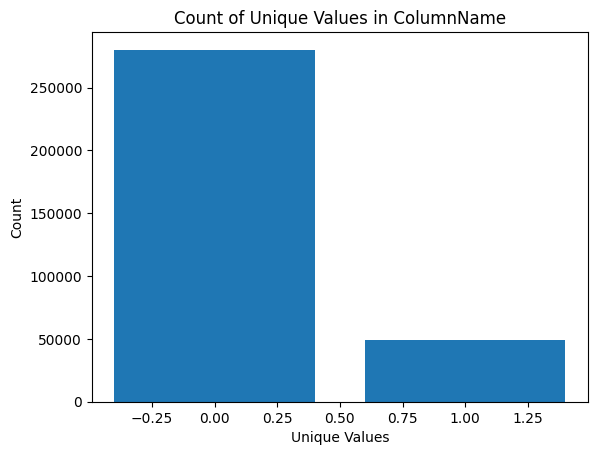

In [ ]:
import matplotlib.pyplot as plt

value_counts = df['Diabete'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in ColumnName')
plt.show()


## High BP
1: No high BP
2: High BP
9: Don't know
We will remove the entry 9 and change the attribute to binary

In [ ]:
df['HighBP'].unique()

array([2., 1., 9.])

In [ ]:
print(df.shape)
df = df[(df['HighBP'] == 1) | (df['HighBP'] == 2)]
print(df.shape)

(329628, 22)
(328957, 22)


In [ ]:
df['HighBP'] = df['HighBP'].replace({1:0,2:1})

print(df['HighBP'].unique())

[1. 0.]


<ipython-input-11-039b68beaf5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HighBP'] = df['HighBP'].replace({1:0,2:1})


## HighChol
1: Yes
2: No
Others: Don't know, refused to answer, missing etc.

In [ ]:
df['HighChol'].unique()

array([1., 2., 7., 9.])

In [ ]:
print(df.shape)
df = df[(df['HighChol'] == 1) | (df['HighChol'] == 2)]
print(df.shape)

(328957, 22)
(326358, 22)


In [ ]:
df['HighChol'] = df['HighChol'].replace({2:0})

print(df['HighChol'].unique())

[1. 0.]


<ipython-input-14-86daa1dd4901>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HighChol'] = df['HighChol'].replace({2:0})


## CholCheck
1- performed the checkup within past 5 years
2- longer than past 5 years
3- never performed any checkup
Others: Don't know, refused to answer, missing etc.

In [ ]:
df['CholCheck'].unique()

array([1., 2., 9.])

In [ ]:
# here we noticed that after performing those steps, variable 3 is out of picture
print(df.shape)
df = df[(df['CholCheck'] == 1) | (df['CholCheck'] == 2)]
print(df.shape)

(326358, 22)
(322132, 22)


In [ ]:
df['CholCheck'] = df['CholCheck'].replace({2:0})

print(df['CholCheck'].unique())

[1. 0.]


<ipython-input-17-7a63c5ecc1c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CholCheck'] = df['CholCheck'].replace({2:0})


## BMI
notice that the BMI displayed here is BMI*100, we divided it to represent our normal scale of BMI

In [ ]:
df['BMI'].describe()

count    322132.000000
mean       2824.497187
std         659.469127
min        1202.000000
25%        2403.000000
50%        2725.000000
75%        3114.000000
max        9765.000000
Name: BMI, dtype: float64

In [ ]:
df['BMI'] = df['BMI'].div(100).round(0)
df['BMI'].describe()

<ipython-input-19-00da5b570551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['BMI'].div(100).round(0)


count    322132.000000
mean         28.228763
std           6.600577
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

## Smoker
1- Yes, 2-No,
others: don't know or refused to answer

In [ ]:
df['Smoker'].unique()

array([1., 2., 7., 9.])

In [ ]:
print(df.shape)
df = df[(df['Smoker'] == 1) | (df['Smoker'] == 2)]
print(df.shape)

(322132, 22)
(320240, 22)


In [ ]:
df['Smoker'] = df['Smoker'].replace({2:0})

print(df['Smoker'].unique())

[1. 0.]


<ipython-input-22-21d37e6d7dcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoker'] = df['Smoker'].replace({2:0})


## Stroke
1- Yes, 2-No,
others: don't know or refused to answer

In [ ]:
df['Stroke'].unique()

array([2., 1., 7., 9.])

In [ ]:
print(df.shape)
df = df[(df['Stroke'] == 1) | (df['Stroke'] == 2)]
print(df.shape)

(320240, 22)
(319550, 22)


In [ ]:
df['Stroke'] = df['Stroke'].replace({2:0})

print(df['Stroke'].unique())

[0. 1.]


<ipython-input-25-c7880b5ad424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stroke'] = df['Stroke'].replace({2:0})


## Heart disease or attack
1- Happened before, 2- never happened

In [ ]:
df['HeartDiseaseorAttack'].unique()

array([2., 1.])

In [ ]:
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].replace({2:0})

print(df['Stroke'].unique())

[0. 1.]


<ipython-input-27-31f0a9a88bb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].replace({2:0})


## Physical activity
1- Yes, 2-No,
others: don't know or refused to answer

In [ ]:
print(df['PhysActivity'].unique())
print(df.shape)
df = df[(df['PhysActivity'] == 1) | (df['PhysActivity'] == 2)]
print(df.shape)

[2. 1. 9.]
(319550, 22)
(304472, 22)


In [ ]:
df['PhysActivity'] = df['PhysActivity'].replace({2:0})
print(df['PhysActivity'].unique())

[0. 1.]


## Fruits
1- consume 1 or more pieces of fruits per day
2- do not have 1 or more pieces of fruits per day
others: don't know or missing

In [ ]:
print(df['Fruits'].unique())
print(df.shape)
df = df[(df['Fruits'] == 1) | (df['Fruits'] == 2)]
print(df.shape)

[2. 1. 9.]
(304472, 22)
(297047, 22)


In [ ]:
df['Fruits'] = df['Fruits'].replace({2:0})
print(df['Fruits'].unique())

[0. 1.]


<ipython-input-31-17bef3d89521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fruits'] = df['Fruits'].replace({2:0})


## Veggies
1- consume 1 or more pieces of veggies per day
2- do not have 1 or more pieces of veggies per day
others: don't know or missing

In [ ]:
print(df['Veggies'].unique())
print(df.shape)
df = df[(df['Veggies'] == 1) | (df['Veggies'] == 2)]
print(df.shape)

[1. 2. 9.]
(297047, 22)
(289690, 22)


In [ ]:
df['Veggies'] = df['Veggies'].replace({2:0})
print(df['Veggies'].unique())

[1. 0.]


<ipython-input-33-739ecf2836ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Veggies'] = df['Veggies'].replace({2:0})


## HvyAlcoholConsump
1- no heavy drinking
2- heavy drinking
others: don't know or missing

In [ ]:
print(df['HvyAlcoholConsump'].unique())
print(df.shape)
df = df[(df['HvyAlcoholConsump'] == 1) | (df['HvyAlcoholConsump'] == 2)]
print(df.shape)

[1. 9. 2.]
(289690, 22)
(286266, 22)


In [ ]:
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].replace({1:0, 2:1})
print(df['HvyAlcoholConsump'].unique())

[0. 1.]


## AnyHealthcare
1- there is healthcare access
2- there is no healthcare access
others: don't know or refused to answer

In [ ]:
print(df['AnyHealthcare'].unique())
print(df.shape)
df = df[(df['AnyHealthcare'] == 1) | (df['AnyHealthcare'] == 2)]
print(df.shape)

[1. 2. 9. 7.]
(286266, 22)
(285790, 22)


In [ ]:
df['AnyHealthcare'] = df['AnyHealthcare'].replace({2:0})
print(df['AnyHealthcare'].unique())

[1. 0.]


<ipython-input-37-e1be929ddc7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AnyHealthcare'] = df['AnyHealthcare'].replace({2:0})


## NoDocbcCost
1- applicable
2- not applicable
others: don't know or refused to answer

In [ ]:
print(df['NoDocbcCost'].unique())
print(df.shape)
df = df[(df['NoDocbcCost'] == 1) | (df['NoDocbcCost'] == 2)]
print(df.shape)

[2. 1. 7. 9.]
(285790, 22)
(285367, 22)


In [ ]:
df['NoDocbcCost'] = df['NoDocbcCost'].replace({2:0})
print(df['NoDocbcCost'].unique())

[0. 1.]


<ipython-input-39-4245595374cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NoDocbcCost'] = df['NoDocbcCost'].replace({2:0})


## General health
1- 5 excellent to poor
others: don't know or refused to answer

In [ ]:
print(df['GenHlth'].unique())
print(df.shape)

[5. 3. 2. 4. 1. 7. 9.]
(285367, 22)


In [ ]:
df = df[(df['GenHlth'] >=1) & (df['GenHlth'] <= 5)]
print(df['GenHlth'].unique())
print(df.shape)

[5. 3. 2. 4. 1.]
(284868, 22)


## Mental health
scale from 1-30 for days that is unwell
88: there is no bad mental health day in a month
other value: don't know or refuse to answer

In [ ]:
print(df['MentHlth'].unique())
print(df.shape)

[18. 88. 30.  3. 99.  5. 15. 10.  6. 20.  2. 25.  1. 29.  4. 77.  7.  8.
 21. 14. 26.  9. 16. 11. 28. 12. 24. 17. 13. 23. 27. 19. 22.]
(284868, 22)


In [ ]:
df['MentHlth'] = df['MentHlth'].replace({88:0})
print(df['MentHlth'].unique())


[18.  0. 30.  3. 99.  5. 15. 10.  6. 20.  2. 25.  1. 29.  4. 77.  7.  8.
 21. 14. 26.  9. 16. 11. 28. 12. 24. 17. 13. 23. 27. 19. 22.]


In [ ]:
df = df[(df['MentHlth'] >=0) & (df['MentHlth'] <= 30)]
print(df['MentHlth'].unique())
print(df.shape)

[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1. 29.  4.  7.  8. 21. 14.
 26.  9. 16. 11. 28. 12. 24. 17. 13. 23. 27. 19. 22.]
(281881, 22)


## Physical health
scale from 1-30 for days that is unwell
88: there is no bad mental health day in a month
other value: don't know or refuse to answer

In [ ]:
print(df['PhysHlth'].unique())
print(df.shape)

[15. 88. 30.  2. 14. 28.  7. 77. 20.  3. 10.  1.  5. 17.  4. 19.  6. 21.
 12.  8. 25. 27. 22. 29.  9. 16. 99. 18. 23. 13. 26. 24. 11.]
(281881, 22)


In [ ]:
df['PhysHlth'] = df['PhysHlth'].replace({88:0})
print(df['PhysHlth'].unique())

[15.  0. 30.  2. 14. 28.  7. 77. 20.  3. 10.  1.  5. 17.  4. 19.  6. 21.
 12.  8. 25. 27. 22. 29.  9. 16. 99. 18. 23. 13. 26. 24. 11.]


<ipython-input-46-347800b4e293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PhysHlth'] = df['PhysHlth'].replace({88:0})


In [ ]:
df = df[(df['PhysHlth'] >=0) & (df['PhysHlth'] <= 30)]
print(df['PhysHlth'].unique())
print(df.shape)

[15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 21. 12.
  8. 25. 27. 22. 29.  9. 16. 18. 23. 13. 26. 24. 11.]
(278373, 22)


## DiffWalk
1- Yes, 2-No,
others: don't know or refused to answer

In [ ]:
print(df['DiffWalk'].unique())
print(df.shape)
df = df[(df['DiffWalk'] == 1) | (df['DiffWalk'] == 2)]
print(df.shape)

[1. 2. 7. 9.]
(278373, 22)
(277629, 22)


In [ ]:
df['DiffWalk'] = df['DiffWalk'].replace({2:0})
print(df['DiffWalk'].unique())

[1. 0.]


##Sex
1- male, 2-female

In [ ]:
print(df['Sex'].unique())
print(df.shape)

[2. 1.]
(277629, 22)


In [ ]:
df['Sex'] = df['Sex'].replace({1:'male', 2:'female'})
print(df['Sex'].unique())

['female' 'male']


## Age (Ordinal)
1: 18-24
2: (refer to metadata)
14: don't know or missing

In [ ]:
print(df['Age'].unique())
print(df.shape)

[ 9.  7. 11. 10. 13.  8.  4.  6.  2. 12.  5.  1.  3. 14.]
(277629, 22)


In [ ]:
df = df[(df['Age'] >=1) & (df['Age'] <= 13)]
print(df['Age'].unique())
print(df.shape)

[ 9.  7. 11. 10. 13.  8.  4.  6.  2. 12.  5.  1.  3.]
(276222, 22)


## Education
1- never attended school
2-6: education years in increasing order
9: refused to answer


In [ ]:
print(df['Education'].unique())
print(df.shape)

[4. 6. 3. 5. 2. 1. 9.]
(276222, 22)


In [ ]:
df = df[(df['Education'] >=1) & (df['Education'] <= 6)]
print(df['Education'].unique())
print(df.shape)

[4. 6. 3. 5. 2. 1.]
(275900, 22)


## Income
1: <10000
2-8: increasing until $75000 or more
77 & 99: don't know or refused to answer

In [ ]:
print(df['Income'].unique())
print(df.shape)

[ 3.  1.  8.  6.  4.  7. 77.  2.  5. 99.]
(275900, 22)


In [ ]:
df = df[(df['Income'] >=1) & (df['Income'] <= 8)]
print(df['Income'].unique())
print(df.shape)

[3. 1. 8. 6. 4. 7. 2. 5.]
(242737, 22)


# Save

In [ ]:
import os

output_directory = '/content/drive/Shared drives/Data Mining Project/'
os.makedirs(output_directory, exist_ok=True)
df.to_csv(os.path.join(output_directory, 'cleaned_data.csv'), index=False)
